1. Set up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2. Upload dataset from Github

In [2]:
url = 'https://raw.githubusercontent.com/deep10ds/deeptendies/master/bucket%3Dfs/topic%3DTSLA/version%3Dyahoo/processed_at%3D2021-04-10/TSLA_2011-04-01_to_2021-04-01.csv'
tsla = pd.read_csv(url,index_col = 0, parse_dates=[0])

In [4]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-04-01,5.636,5.314,5.490,5.332,14324000.0,5.332
2011-04-04,5.400,5.046,5.366,5.166,13046500.0,5.166
2011-04-05,5.400,5.138,5.180,5.340,15904500.0,5.340
2011-04-06,5.402,5.160,5.398,5.298,6441500.0,5.298
2011-04-07,5.588,5.290,5.370,5.448,14051500.0,5.448


In [7]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2011-04-01 to 2021-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2517 non-null   float64
 1   Low        2517 non-null   float64
 2   Open       2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Volume     2517 non-null   float64
 5   Adj Close  2517 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


* There are no null values
* Every value is in the correct format

### Timeframes
* At this point I will analyze the stock performance in **months**
* with **resample** I will obtain the mean of the data by month

In [9]:
tsla.resample('M').mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-04-30,5.344700,5.127900,5.257900,5.233200,7.473725e+06,5.233200
2011-05-31,5.624095,5.384095,5.527048,5.522571,7.225905e+06,5.522571
2011-06-30,5.738636,5.484091,5.615909,5.576818,9.028932e+06,5.576818
2011-07-31,5.797600,5.597900,5.695300,5.682800,5.275525e+06,5.682800
2011-08-31,5.126870,4.828000,4.999391,4.963913,5.916457e+06,4.963913
2011-09-30,5.042762,4.792095,4.926952,4.921905,4.290833e+06,4.921905
2011-10-31,5.582571,5.330381,5.437809,5.499714,5.157762e+06,5.499714
2011-11-30,6.528381,6.227143,6.358191,6.416000,6.154000e+06,6.416000
2011-12-31,6.114762,5.876000,6.004667,5.996000,5.030595e+06,5.996000


In [10]:
# assign `Adj Close` to `daily_close`daily_close = tsla[['Adj Close']]
daidaily_closead(5)

,Adj Close
Date,
2011-04-01,5.332
2011-04-04,5.166
2011-04-05,5.340
2011-04-06,5.298
2011-04-07,5.448


The formula used in pct_change() is:

Return = {(Price at t) — (Price at t-1)} / {Price at t-1}

In [13]:
# returns as fractional change
daily_return = daily_close.pct_change()
daily_return.head(5)

,Adj Close
Date,
2011-04-01,NaN
2011-04-04,-0.031133
2011-04-05,0.033682
2011-04-06,-0.007865
2011-04-07,0.028313


In [14]:
# replacing NA values with 0
daily_return.fillna(0, inplace=True)

## Monthly returns

In [10]:
mdata = tsla.resample('M').apply(lambda x: x[-1])
monthly_return = mdata.pct_change()
monthly_return.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2011-05-31,0.086473,0.077680,0.072228,0.092029,3.532369,0.092029
2011-06-30,-0.031374,-0.038917,-0.040081,-0.033510,-0.712293,-0.033510
2011-07-31,-0.031708,-0.031690,-0.024561,-0.032956,0.001584,-0.032956
2011-08-31,-0.102113,-0.117091,-0.107914,-0.121761,-0.131196,-0.121761


## Moving averages 
Moving Window Calculations -> analysts often have to evaluate statistical metrics continually over a sliding window of time

In [11]:
# assigning adjusted closing prices to 
adj_price = tsla['Adj Close']
adj_price.head(5)

Date
2011-04-01    5.332
2011-04-04    5.166
2011-04-05    5.340
2011-04-06    5.298
2011-04-07    5.448
Name: Adj Close, dtype: float64

In [12]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()
mav.head(50)

Date
2011-04-01       NaN
2011-04-04       NaN
2011-04-05       NaN
2011-04-06       NaN
2011-04-07       NaN
2011-04-08       NaN
2011-04-11       NaN
2011-04-12       NaN
2011-04-13       NaN
2011-04-14       NaN
2011-04-15       NaN
2011-04-18       NaN
2011-04-19       NaN
2011-04-20       NaN
2011-04-21       NaN
2011-04-25       NaN
2011-04-26       NaN
2011-04-27       NaN
2011-04-28       NaN
2011-04-29       NaN
2011-05-02       NaN
2011-05-03       NaN
2011-05-04       NaN
2011-05-05       NaN
2011-05-06       NaN
2011-05-09       NaN
2011-05-10       NaN
2011-05-11       NaN
2011-05-12       NaN
2011-05-13       NaN
2011-05-16       NaN
2011-05-17       NaN
2011-05-18       NaN
2011-05-19       NaN
2011-05-20       NaN
2011-05-23       NaN
2011-05-24       NaN
2011-05-25       NaN
2011-05-26       NaN
2011-05-27       NaN
2011-05-31       NaN
2011-06-01       NaN
2011-06-02       NaN
2011-06-03       NaN
2011-06-06       NaN
2011-06-07       NaN
2011-06-08       NaN
2011-06-

## Plotting

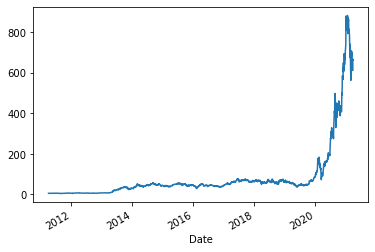

In [13]:
adj_price.plot();

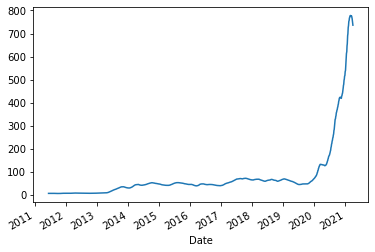

In [14]:
mav.plot();